# Netflix Content Analysis: Comprehensive EDA

## 1. Project Objective
Perform an **in-depth exploratory data analysis** of the Netflix dataset. The goal is to explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of Movies and TV Shows on the platform.  
This project extends basic EDA by introducing time-series analysis, richer data cleaning, and more advanced transformation techniques.

- **Data Cleaning & Transformation:** Handle missing values, standardize fields, and convert data types (especially date columns).  
- **Time-Series Analysis:** Analyze how content has been added to Netflix over the years.  
- **Text Data Manipulation:** Parse and analyze multi-valued columns such as `listed_in` (genres) and `cast`.  
- **Geographical & Rating Analysis:** Understand where content comes from and its maturity level.  
- **Feature Engineering:** Create new features, including `content_age`.  
- **Advanced Visualization:** Generate plots to explore distributions, trends, and relationships across the dataset.

---

## 2. Methodology
The analysis begins by inspecting and cleaning the dataset, resolving missing values, fixing data types, and normalizing text fields. Feature engineering is applied to extract genres, countries, cast members, and compute derived fields like content age. Finally, exploratory analysis and visualizations are used to uncover patterns in content type, ratings, geography, and temporal trends.

---

## 3. Dataset Information
**Source:** [Netflix Movies and TV Shows (Kaggle)](https://www.kaggle.com/datasets/shivamb/netflix-shows)

The dataset contains metadata for Netflix Movies and TV Shows, including titles, cast, directors, countries, genres, maturity ratings, and release/addition dates.

# Step 1: Importing Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

# Step 2: Data Loading and Initial Inspection

We'll load the `netflix_titles.csv` dataset and perform a high-level overview.

In [2]:
!git clone 'https://github.com/git-elton-s/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 1.19 MiB | 3.05 MiB/s, done.


In [3]:
# Loading the dataset
file_path = '/content/Datasets/Netflix_Titles_Dataset/netflix_titles.csv'
df = pd.read_csv(file_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Interpretation of `.info()`:**
- We have 7787 entries (titles).
- **Key Problem:** The `date_added` column is of type `object`, not `datetime` object. We cannot perform time-based analysis until this is corrected.
- **Missing Values:** `director`, `cast`, `country`, `date_added`, and `rating` all have missing values. `director` has the most significant number of nulls.

In [6]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Step 3: Data Cleaning and Transformation

This step is critical for ensuring our analysis is accurate. We will handle missing values and correct data types.

In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [8]:
## 1) Handling missing values in 'Director' and 'cast'

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [10]:
## 2) Handling missing values in 'country'
mode_country = df['country'].mode()[0]
print(mode_country)
df['country'] = df['country'].fillna(mode_country)

United States


In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [12]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.

df.dropna(subset=['date_added','rating'], inplace=True)

In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [14]:
## 4) Convert 'date_added' to a datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [17]:
## 5) Creating a new feature for year and month

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


# Step 4: Exploratory Data Analysis & Visualization
### 4.1 What is the distribution of content type?

In [19]:
df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


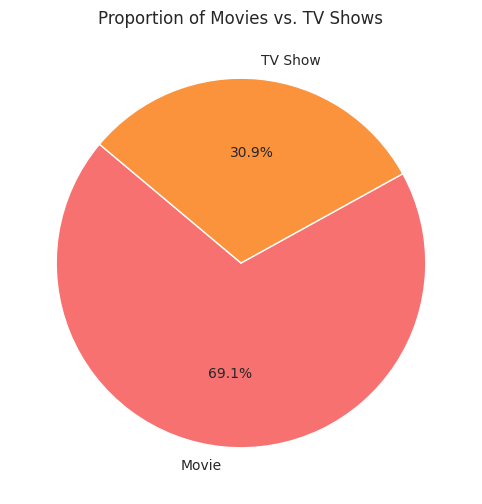

In [20]:
plt.figure(figsize=(8,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#f87171', '#fb923c'])
plt.title('Proportion of Movies vs. TV Shows')
plt.show()

#### Insight
The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

### 4.2 How has content been added over time?


<Figure size 1400x800 with 0 Axes>

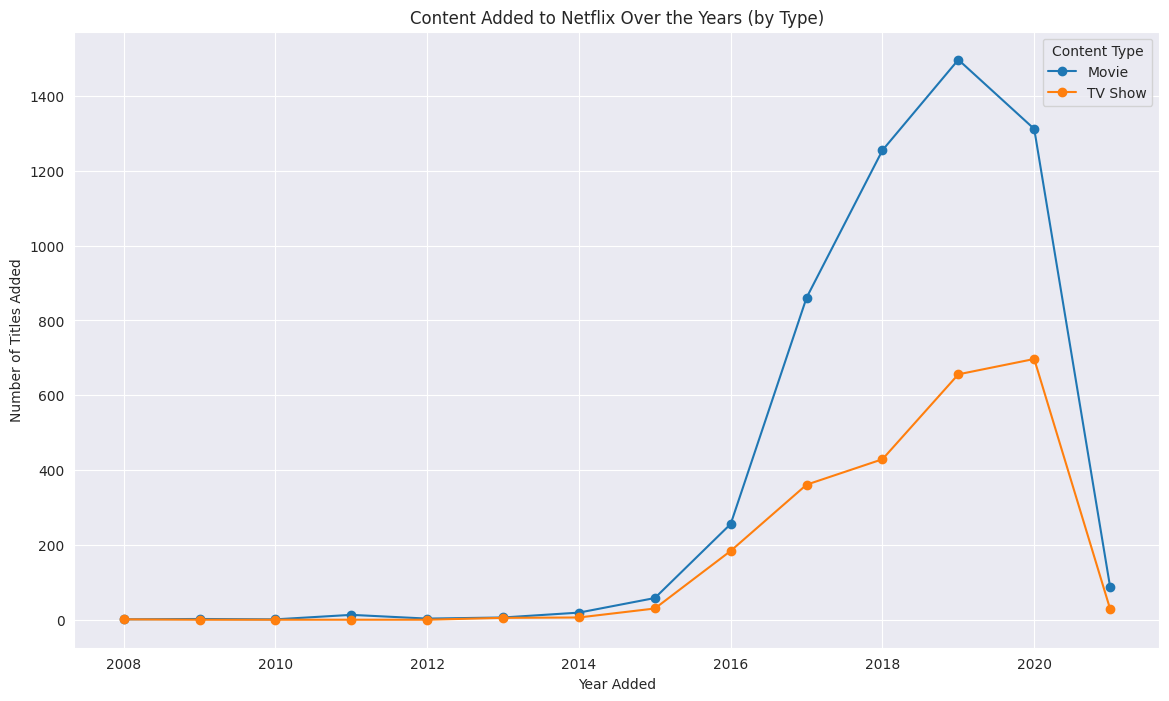

In [21]:
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14,8))
content_over_time.plot(kind = 'line', marker = 'o', figsize=(14,8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

#### Insight
Netflix’s content additions show a dramatic spike starting around 2016, with Movies and TV Shows both accelerating sharply, peaking in 2019. Movie additions rise more aggressively, reaching nearly 1,500 titles in 2019, while TV Shows grow steadily but at a slower pace.

After 2019, additions to both categories drop significantly, likely due to pandemic-related constraints and production slowdowns.

### 4.3 What are the most popular genres?


#### Handling Multi-Genre Entries

The `listed_in` column contains multiple genres stored in a single string.  
To analyze genres individually, we first **split** the string into a list of genres and then **explode** the DataFrame so that each genre becomes its own row.


In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [23]:
genres = df.assign(genre = df['listed_in'].str.split(', ')).explode('genre')

In [24]:
genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies


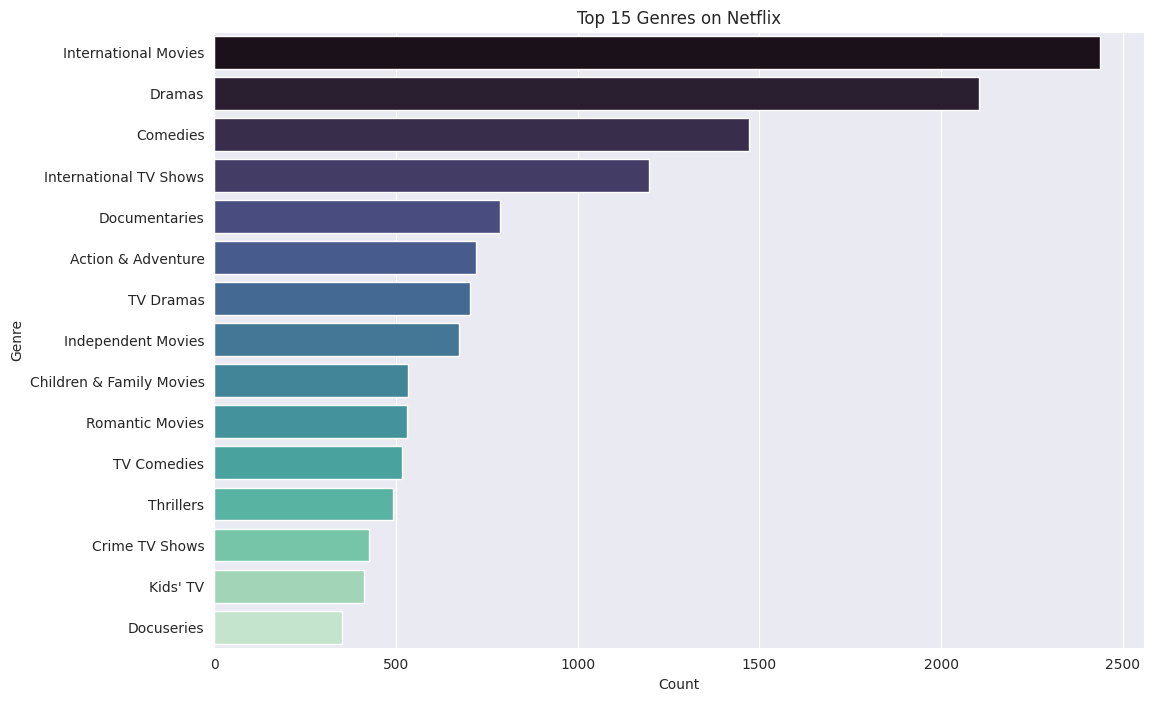

In [25]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

#### Insight
"International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

### 4.4 What is the distribution of content duration?

In [26]:
## Seperate movies and TV Shows

movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [27]:
tv_shows_df['duration'] = tv_shows_df['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)
tv_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3


In [28]:
movies_df['duration'] = movies_df['duration'].str.replace(' min','').astype(int)
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6


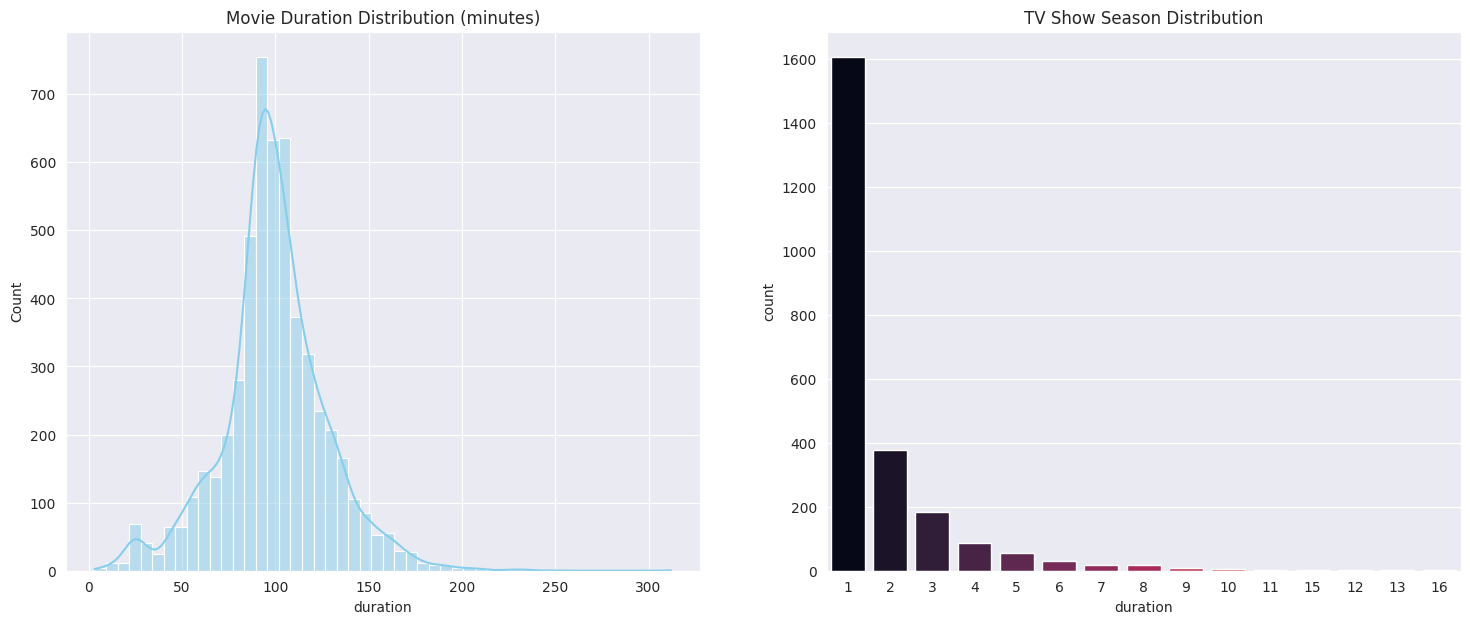

In [29]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='duration', data=tv_shows_df, palette='rocket', order=tv_shows_df['duration'].value_counts().index, hue='duration', legend=False).set_title('TV Show Season Distribution')

plt.show()

#### Insight
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

### 4.5 Where does the content come from? (Geographical Analysis)

In [30]:
## Handle the mult-country listed
countries = df.assign(country = df['country'].str.split(', ')).explode('country')
countries.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [31]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity
top_countries_counts.head()

,country,count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349


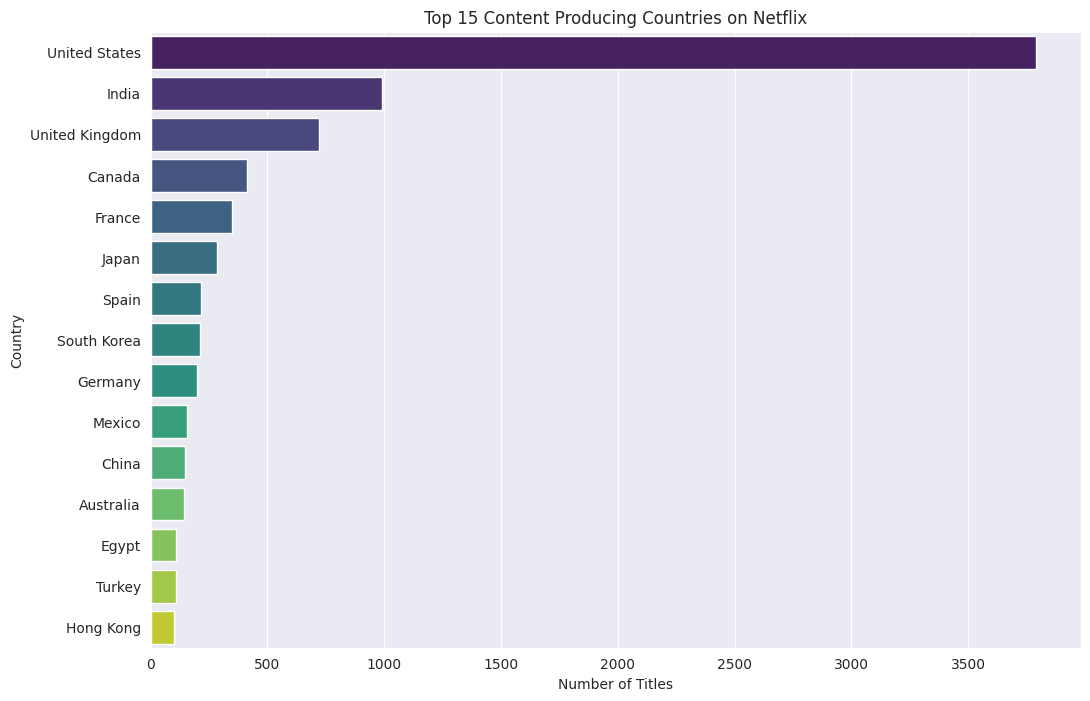

In [32]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

#### Insight
The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

### 4.6 What are the maturity ratings of the content?

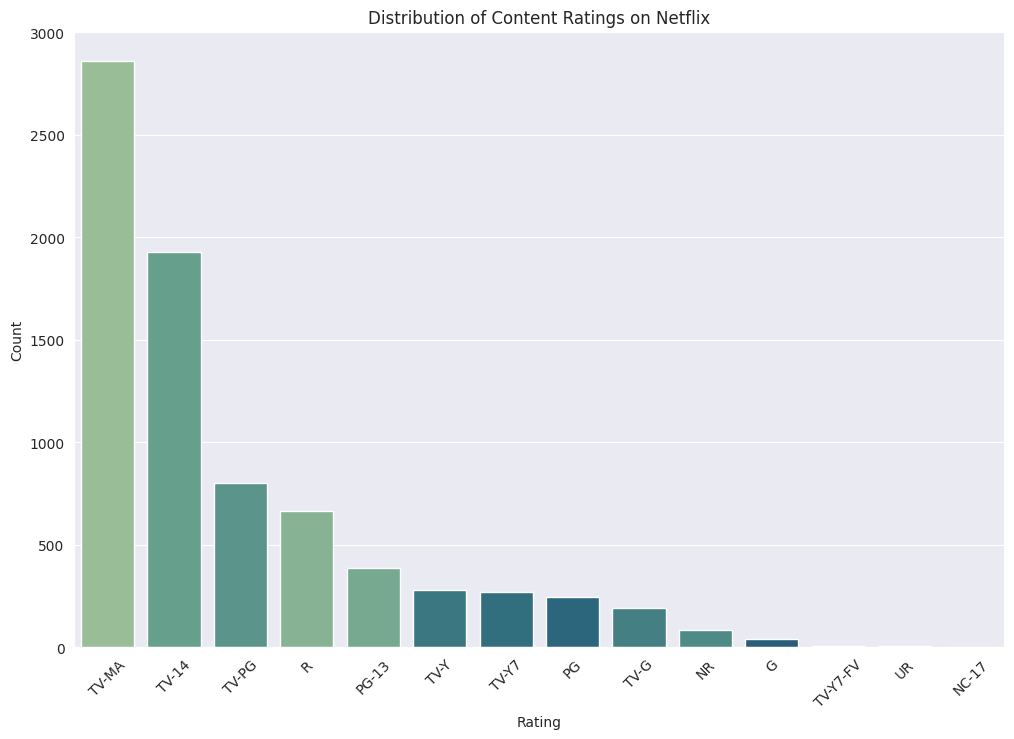

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Insight
A large portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (`TV-G`, `TV-Y`).

# Step 5: Feature Engineering - Content Freshness
To understand how recent or old a title is when it arrives on Netflix, we create a new feature that measures the gap between its `release_year` and the year it was added to the platform (`year_added`).

This can tell us about their acquisition strategy (buying old library content vs. releasing new originals).

In [34]:
## Creating a column 'age_on_netflix' feature

df['age_on_netflix'] = df['year_added'] - df['release_year']

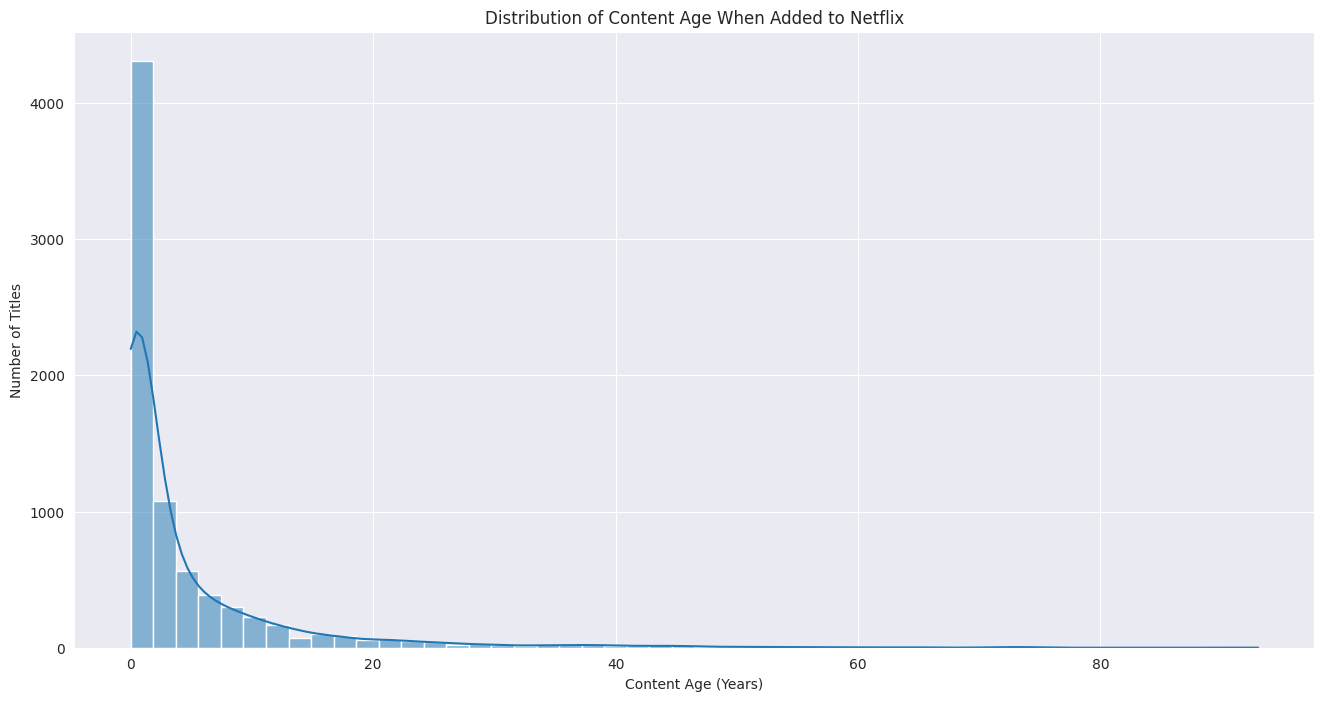

In [35]:
## Filter out any potential errors when added_year is before release_year

content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(16, 8))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

#### Insight
The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

# Step 6: Deeper Multivariate Analysis

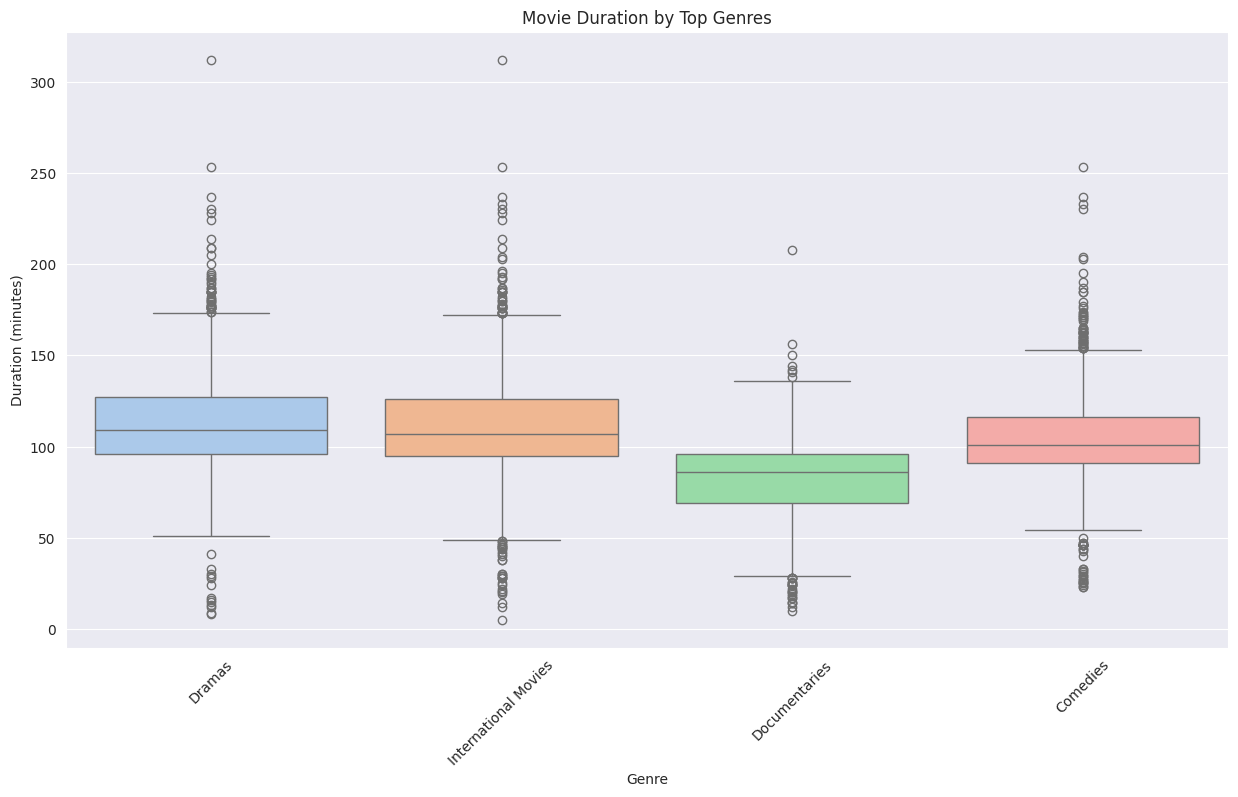

In [36]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

#### Insight
While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

# Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

In [37]:
text = ' '.join(df['description'])

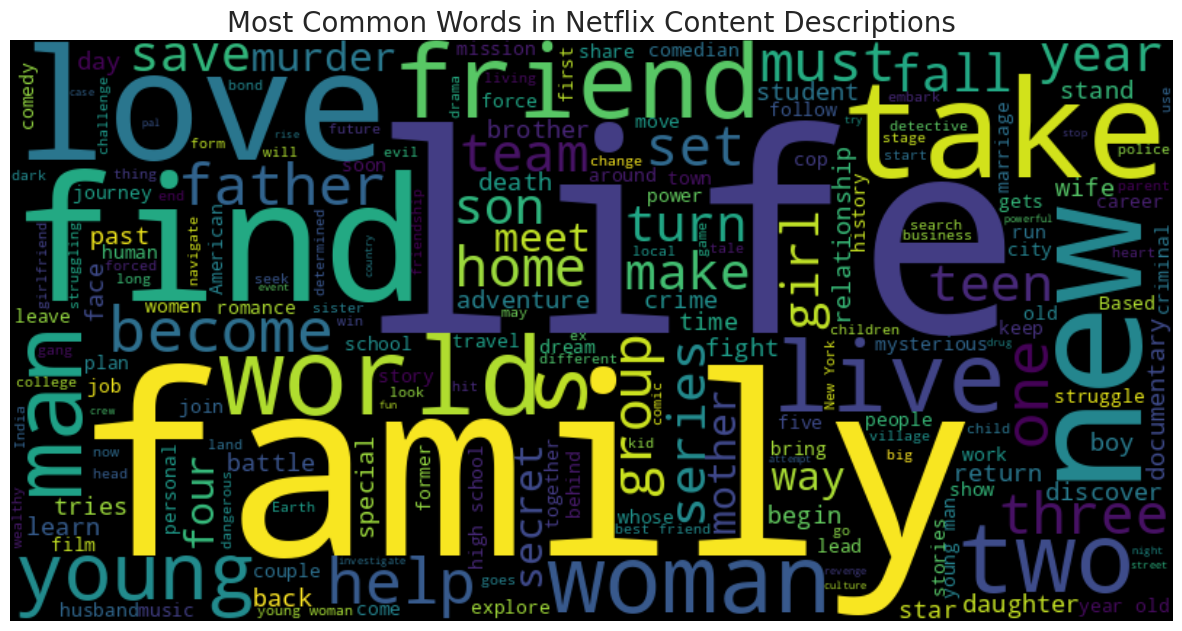

In [38]:
## Generating the visual
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

#### Insight
The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

# Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

# Additional Analysis

### 1. How has the distribution of content ratings changed over time?

<Figure size 1600x800 with 0 Axes>

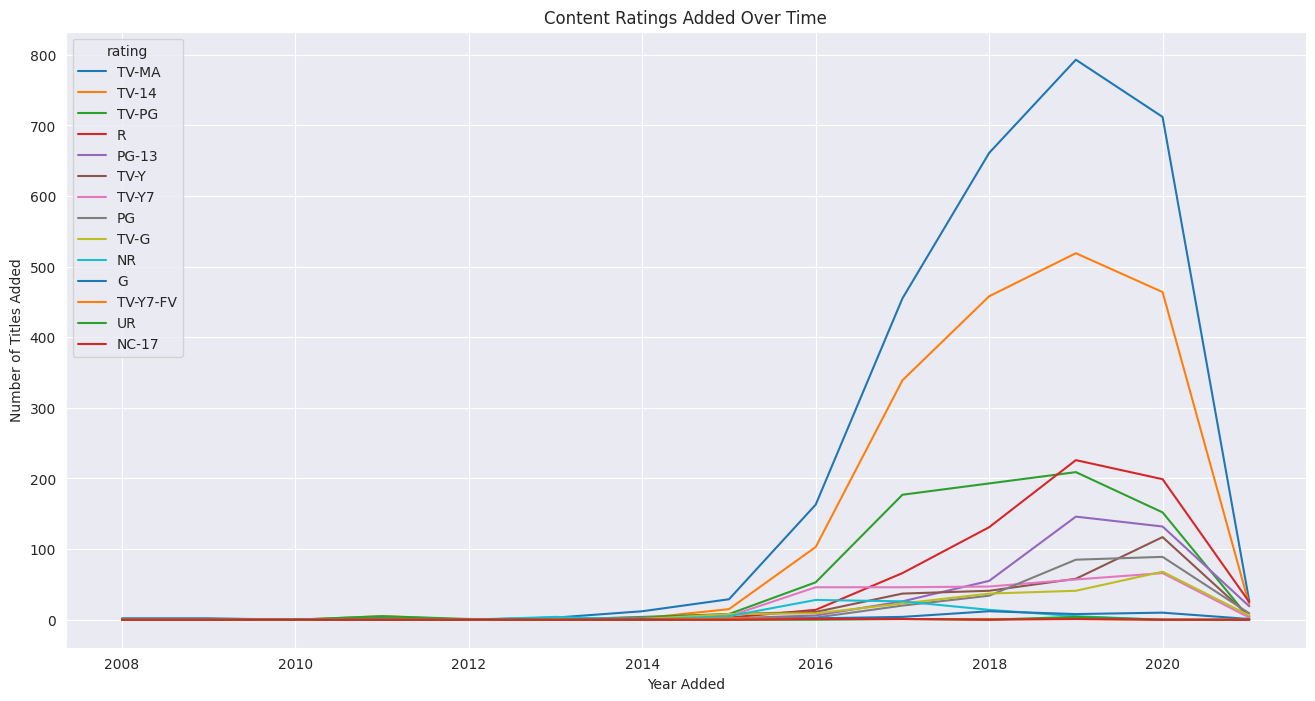

In [39]:
ratings_over_time = df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

# Sort rating categories by their total frequency so the plot/legend displays them in descending order
ratings_over_time = ratings_over_time[ratings_over_time.sum().sort_values(ascending=False).index]

plt.figure(figsize=(16,8))
ratings_over_time.plot(kind='line', figsize=(16,8))
plt.title('Content Ratings Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


In [40]:
rating_num = df['rating'].nunique()
print(f'Number of categories: {rating_num} \n')

print('rating Count:')
print(df['rating'].value_counts())

Number of categories: 14 

rating Count:
rating
TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


### Handling High Cardinality in Content Ratings

The `rating` column has 14 categories, which makes a single line chart cluttered and hard to read. Many lines overlap, and the colors become too similar to distinguish.

To simplify the analysis while keeping the important patterns, we keep the **top 5 most common ratings** and group the rest into an **"Other"** category.


In [41]:
# Identify top 5 ratings
top_5_ratings = df['rating'].value_counts().nlargest(5).index

# Create cleaned rating column
df['rating_clean'] = df['rating'].where(df['rating'].isin(top_5_ratings), 'Other')

<Figure size 1600x800 with 0 Axes>

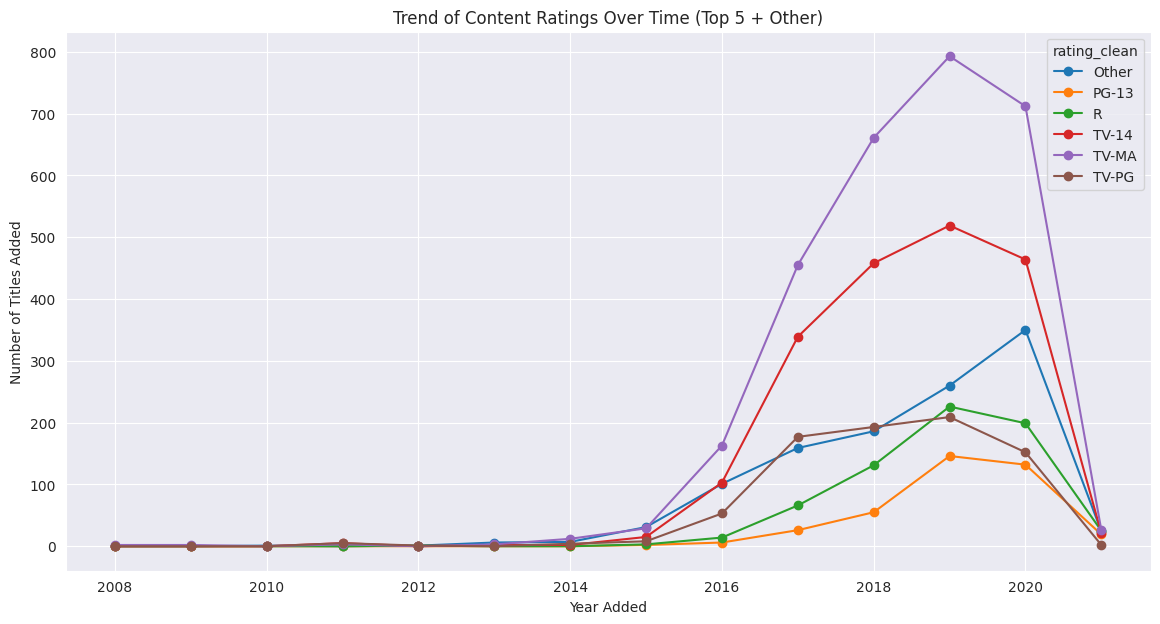

In [42]:
ratings_over_time_clean = df.groupby(['year_added', 'rating_clean']).size().unstack().fillna(0)

plt.figure(figsize=(16, 8))
ratings_over_time_clean.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Trend of Content Ratings Over Time (Top 5 + Other)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


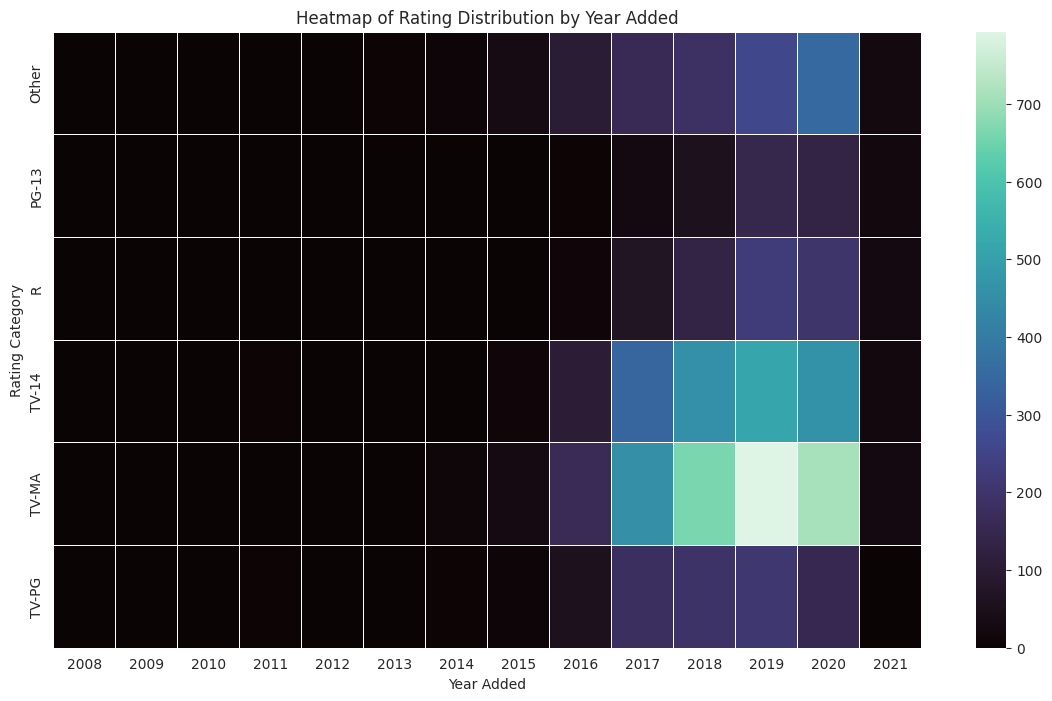

In [43]:
plt.figure(figsize=(14, 8))
sns.heatmap(ratings_over_time_clean.T, cmap='mako', linewidths=0.5)
plt.title('Heatmap of Rating Distribution by Year Added')
plt.xlabel('Year Added')
plt.ylabel('Rating Category')
plt.show()

#### Insight
Netflix’s additions from 2016 onward show a clear dominance of mature ratings, especially `TV-MA` and `TV-14`, which grow sharply compared to earlier years. The heatmap highlights that these categories consistently receive the highest volume of new titles each year, while family-oriented ratings remain sparse and relatively flat over time. This pattern reflects Netflix’s strategic focus on adult-targeted content and original productions aimed at older viewers.

### Is there a relationship between content age and its type (Movie vs. TV Show)?

To understand whether Movies and TV Shows differ in how old they are when added to Netflix, we compare the distribution of the `age_on_netflix` feature across both content types.


/tmp/ipython-input-1061341015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='age_on_netflix', palette='flare')


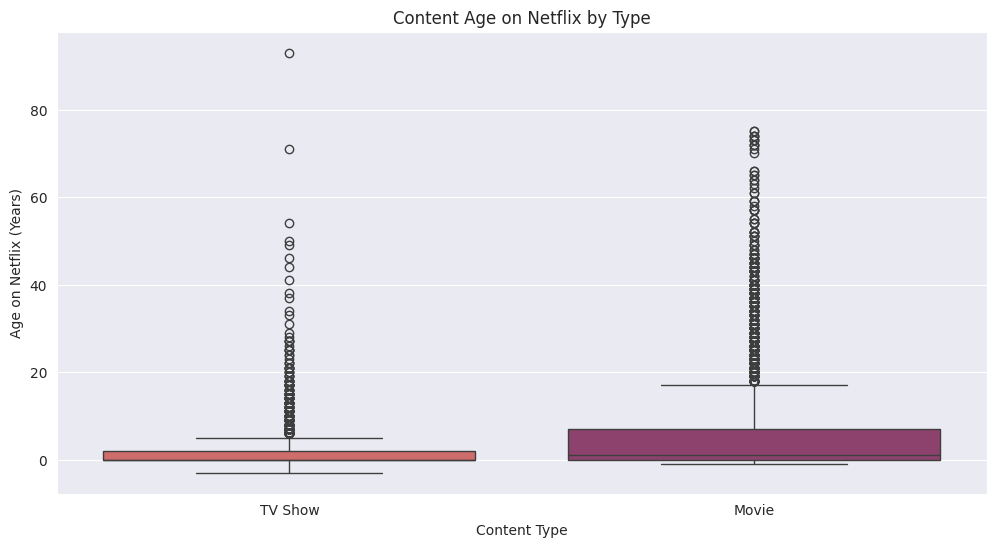

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='age_on_netflix', palette='flare')
plt.title('Content Age on Netflix by Type')
plt.xlabel('Content Type')
plt.ylabel('Age on Netflix (Years)')
plt.show()

/tmp/ipython-input-3993653796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='type', y='age_on_netflix', palette='flare')


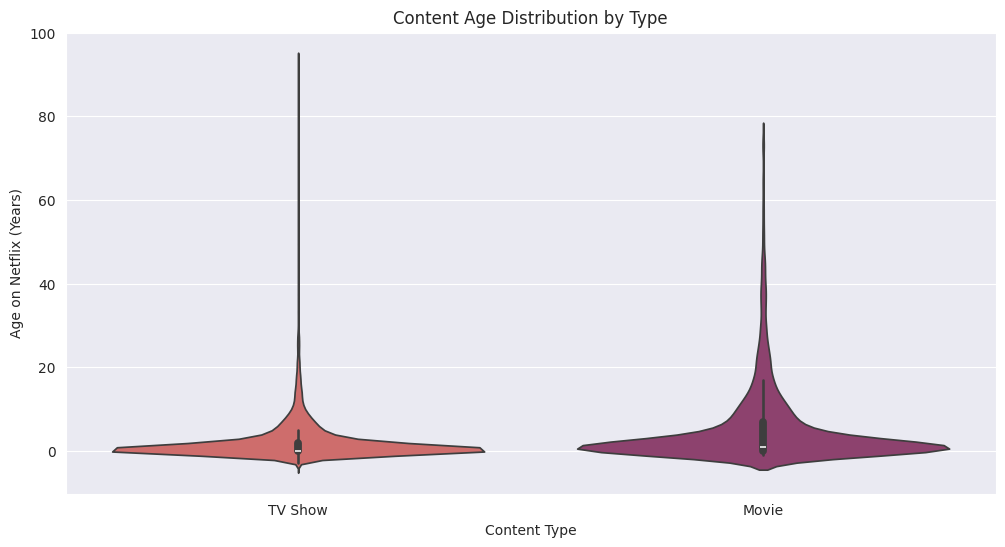

In [45]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='type', y='age_on_netflix', palette='flare')
plt.title('Content Age Distribution by Type')
plt.xlabel('Content Type')
plt.ylabel('Age on Netflix (Years)')
plt.show()


/tmp/ipython-input-658409258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='type', y='age_on_netflix', alpha=0.3, palette='flare')


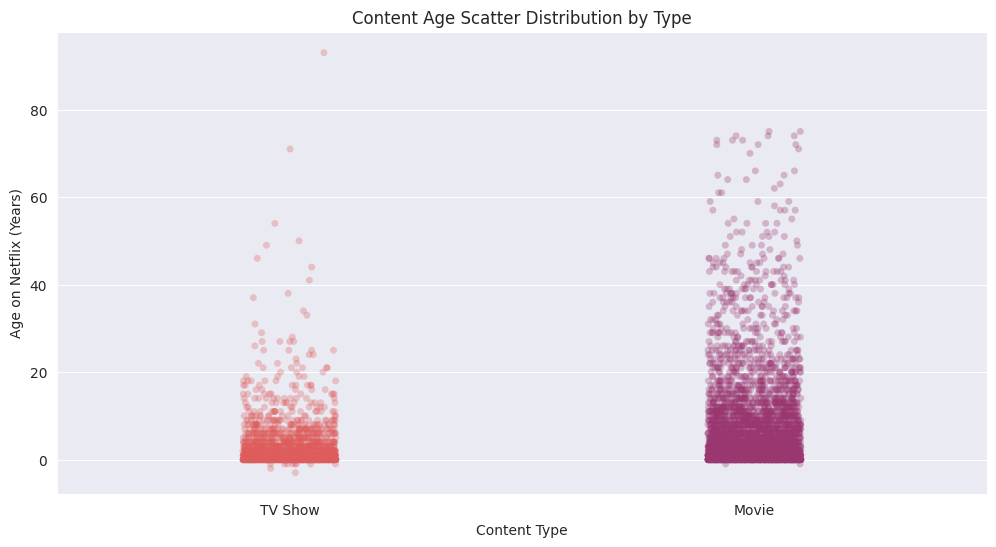

In [46]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='type', y='age_on_netflix', alpha=0.3, palette='flare')
plt.title('Content Age Scatter Distribution by Type')
plt.xlabel('Content Type')
plt.ylabel('Age on Netflix (Years)')
plt.show()


#### Insight
Movies show a much wider range of “age on Netflix,” indicating that Netflix frequently acquires older films—some released decades before they were added to the platform.

TV Shows, on the other hand, cluster much closer to age zero, meaning most shows arrive on Netflix within a short time of release.

### 3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?


To understand how Netflix builds and evolves its catalog, we compare two timelines:

- Release Year: when a title was originally produced
- Year Added: when Netflix added that title to its platform

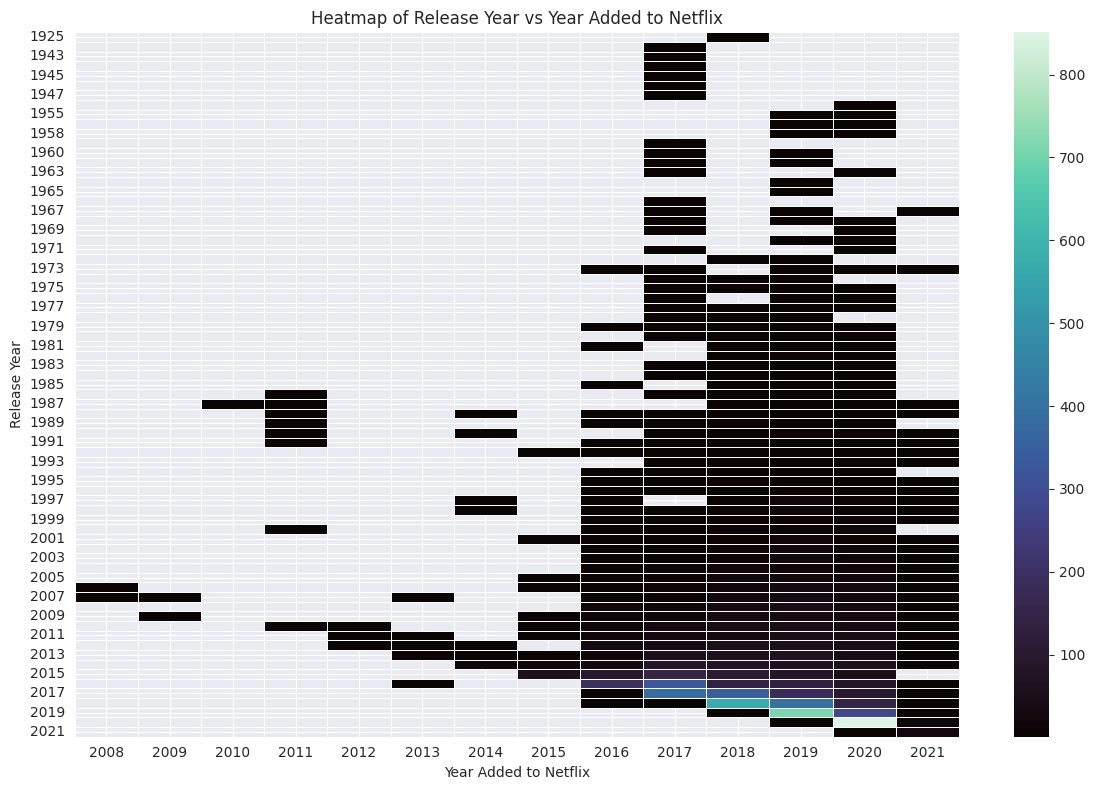

In [47]:
# Group by release_year and year_added
release_added_counts = (df.groupby(['release_year', 'year_added']).size().reset_index(name='count'))

# Pivot for heatmap
heatmap_data = release_added_counts.pivot(index='release_year', columns='year_added', values='count')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='mako', linewidths=0.5)
plt.title('Heatmap of Release Year vs Year Added to Netflix')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Release Year')
plt.tight_layout()
plt.show()


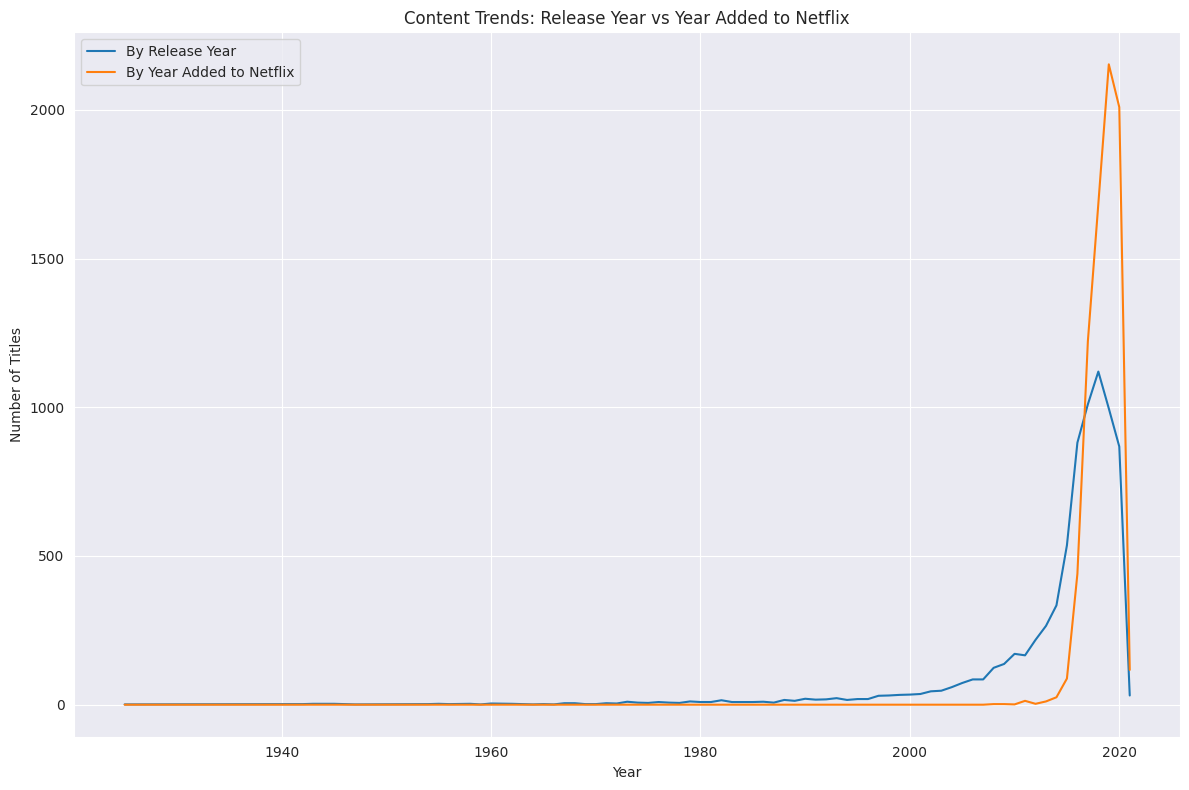

In [48]:
# Count titles by release year
release_trend = df.groupby('release_year').size()
# Count titles by year added
added_trend = df.groupby('year_added').size()

# To plot them on the same x-axis, align the index
all_years = sorted(set(release_trend.index).union(set(added_trend.index)))
release_trend = release_trend.reindex(all_years, fill_value=0)
added_trend = added_trend.reindex(all_years, fill_value=0)

plt.figure(figsize=(12, 8))
plt.plot(all_years, release_trend.values, label="By Release Year")
plt.plot(all_years, added_trend.values, label="By Year Added to Netflix")
plt.legend()
plt.title("Content Trends: Release Year vs Year Added to Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


The heatmap and the line plot clearly show that many titles were added in and around the same year they were released. A big bulk of older TV shows and movies were added in the period between 2016 and 2019.

From our previous analysis, we saw that after 2019, the number of releases significantly dropped and we attributed it to likely being pandemic-related constraints and production slowdowns. These graphs display the same pattern.

### 4. What are the most common word pairs or phrases in content descriptions?


We use two NLP approaches:

1. **NLTK** to extract the most frequent **word pairs (bigrams)**  
2. **Scikit-Learn** to extract the most frequent **three-word phrases (trigrams)**  

#### Word Pair Analysis Using NLTK

In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import re

nltk.download('stopwords')

# Combine descriptions into one text block
text = " ".join(df['description'].astype(str)).lower()

# Remove punctuation and non-letters
text = text.lower()
text = re.sub(r'[^a-z\s]', ' ', text)

# Tokenize
tokens = text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [t for t in tokens if t not in stop_words]

# Generate bigrams
bigrams = list(ngrams(tokens, 2))

# Count frequencies
bigram_counts = Counter(bigrams).most_common(20)

# Convert to DataFrame
bigram_df = pd.DataFrame(bigram_counts, columns=["bigram", "count"])
bigram_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,bigram,count
0,"(high, school)",133
1,"(year, old)",130
2,"(young, man)",103
3,"(young, woman)",98
4,"(new, york)",86
5,"(small, town)",59
6,"(best, friend)",51
7,"(true, story)",48
8,"(stand, special)",47
9,"(world, war)",46


/tmp/ipython-input-3387559315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


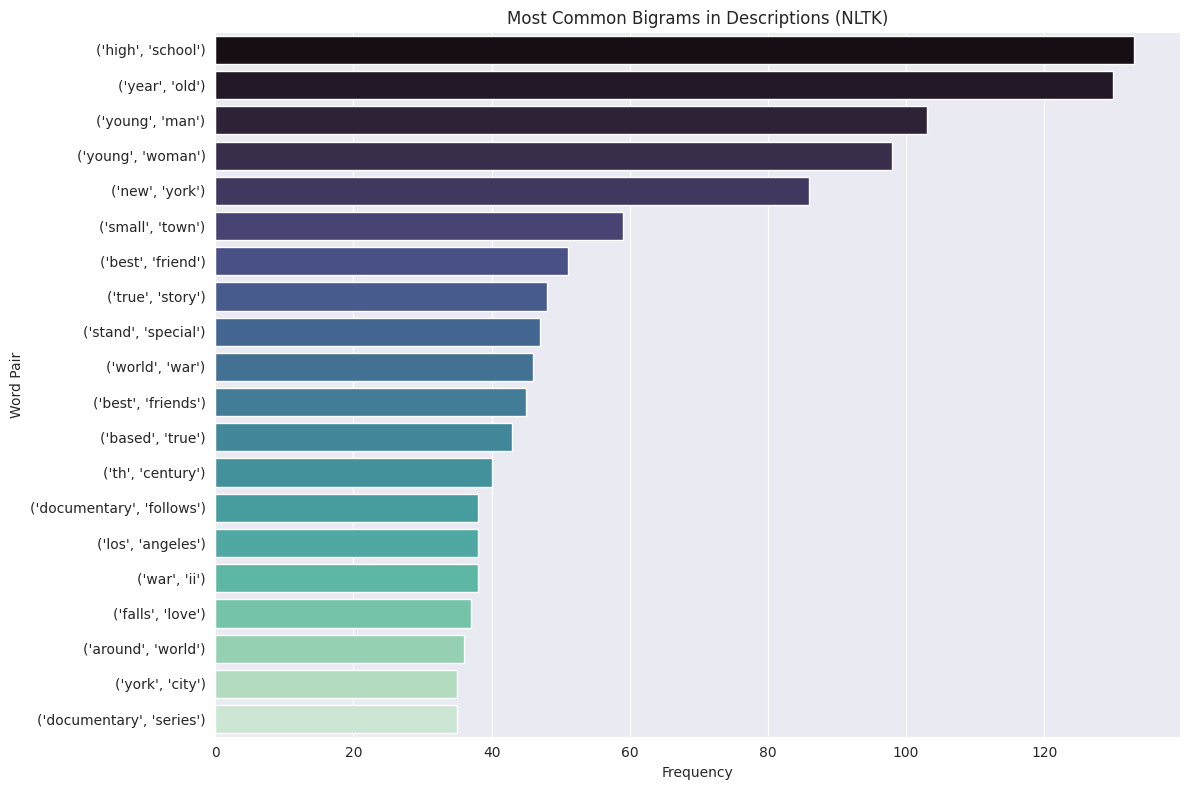

In [55]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=bigram_df,
    x="count",
    y=bigram_df["bigram"].astype(str),
    palette="mako"
)
plt.title("Most Common Bigrams in Descriptions (NLTK)")
plt.xlabel("Frequency")
plt.ylabel("Word Pair")
plt.tight_layout()
plt.show()


#### Scikit-Learn CountVectorizer

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Create trigram vectorizer
vectorizer = CountVectorizer(
    stop_words='english',
    ngram_range=(3, 3)  # extract 3-word phrases
)

# Fit-transform descriptions
X = vectorizer.fit_transform(df['description'].astype(str))

# Get frequencies
trigram_freq = X.sum(axis=0).A1
trigram_names = vectorizer.get_feature_names_out()

# Build DataFrame
trigram_df = pd.DataFrame({
    "phrase": trigram_names,
    "count": trigram_freq
}).sort_values(by="count", ascending=False).head(20)

trigram_df


,phrase,count
89047,world war ii,38
55007,new york city,35
6029,based true story,25
6027,based true events,16
74,11 year old,13
46,10 year old,12
89468,year old girl,10
22676,dreams come true,8
147,17 year old,8
40565,inspired true events,8


/tmp/ipython-input-2487030543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


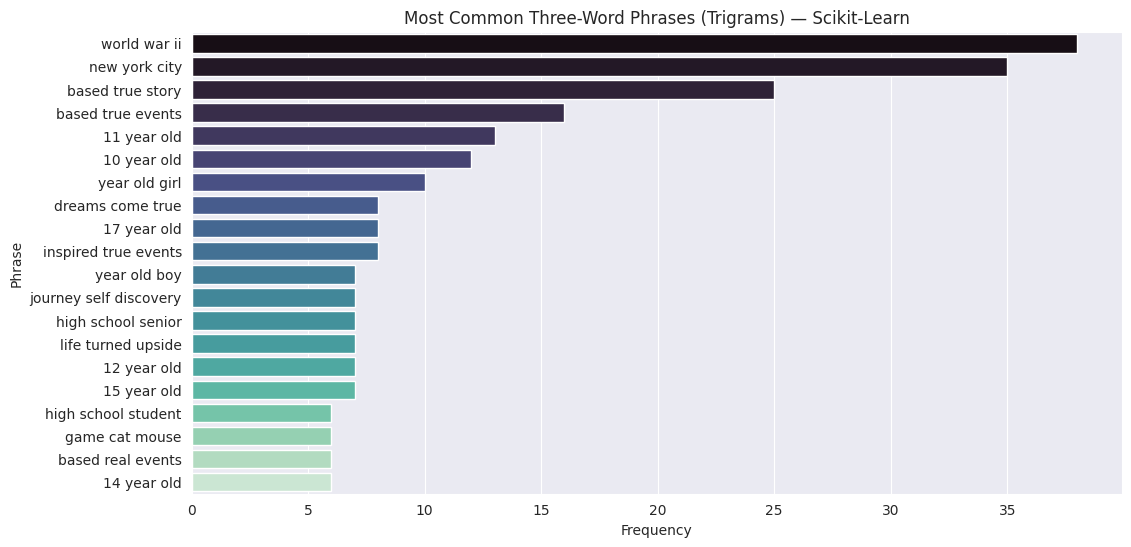

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=trigram_df,
    x="count",
    y="phrase",
    palette="mako"
)
plt.title("Most Common Three-Word Phrases (Trigrams) — Scikit-Learn")
plt.xlabel("Frequency")
plt.ylabel("Phrase")
plt.show()


#### Insight

The most frequent word pairs show that Netflix descriptions often focus on young characters, with phrases like "high school", “year old,” “young man,” and “high school” being most frequent.

We also see location-based terms such as “New York” and “small town,” suggesting familiar and relatable settings.

There’s also a noticeable presence of phrases like “true story,” “world war,” and “based true events,” which hints that Netflix leans heavily into content framed as realistic or inspired by real life.

The most common three word pairs also show a similar trend.